# Objective

**Assignment 10A**

The task in this assignment is to use this [image](https://media.karousell.com/media/photos/products/2018/08/20/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg) and show the GradCAM results

  1. In this task VGG16 Net is used
  2. The weights for imagnet on VGG16 are loaded in the model
  3. Display Activation/ Heat map of convolution blocks using GradCAM algorithm

# **Import Libraries and Modules**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


# GRADCAM

Let's start with a pretrained VGG model

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import cv2

1.  Loading helper functions
2.  Load VGG
3. Load Image
4. Rescale image to 224x224x3 (VGG's expectation, why?)
5. Use expand_dims to convert image to a batch of size 1
6. Preprocesing normalizes our input image by subtracting mean RGB values

In [3]:
model = VGG16(weights="imagenet")
model.summary()


W0712 19:30:53.244770 139913924065152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 19:30:53.284350 139913924065152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 19:30:53.293819 139913924065152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0712 19:30:53.330985 139913924065152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



553467904/553467096 [==============================] - 13s 0us/step


W0712 19:31:12.367407 139913924065152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0712 19:31:12.368598 139913924065152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
def gradcam(layer, x):

  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  print(class_idx)
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer(layer)
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  
  pooled_grads_value, conv_layer_output_value = iterate([x])
  
  for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
  heatmap = np.mean(conv_layer_output_value, axis = -1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  
  heatmap = cv2.resize(heatmap, (stark.shape[1], stark.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(stark, 0.5, heatmap, 0.5, 0)
  
  return superimposed_img

837
837
837


Text(0.5, 1.0, 'block5_conv1 gradcam image')

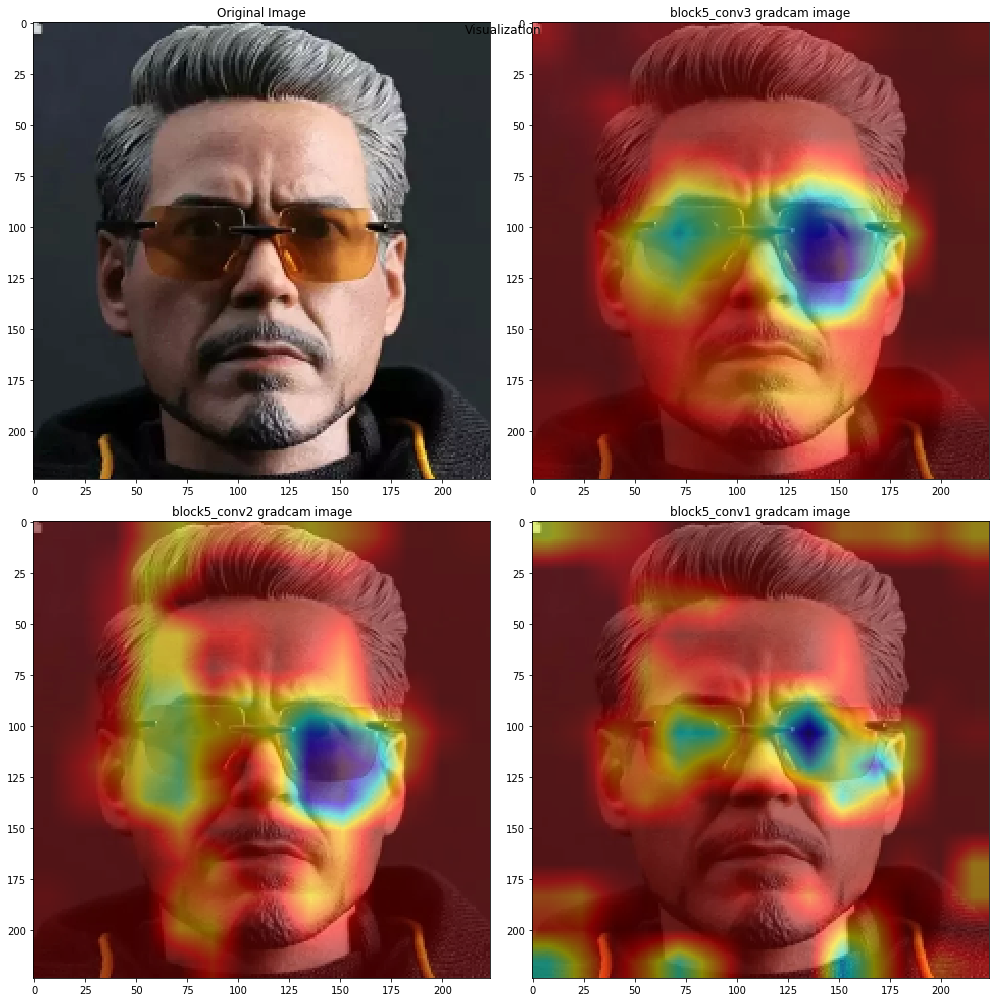

In [10]:
from skimage import io
stark = io.imread("https://i.ibb.co/M98BHtM/tony-stark.png")
stark = cv2.resize(stark, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(stark)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

#from a subplot of 5X5 images with each figure of 20X20
fig, ax = plt.subplots(2, 2, figsize = (14, 14))
  
fig.tight_layout()
#give title to sub plot
fig.suptitle('Visualization')

ax[0,0].imshow(stark)
ax[0,0].set_title("Original Image")

ax[0,1].imshow(gradcam("block5_conv3", x))
ax[0,1].set_title("block5_conv3 gradcam image")


ax[1,0].imshow(gradcam("block5_conv2", x))
ax[1,0].set_title("block5_conv2 gradcam image")

ax[1,1].imshow(gradcam("block5_conv1", x))
ax[1,1].set_title("block5_conv1 gradcam image")

In [11]:
!pip install keract

40960/35363 [==================================] - 0s 0us/step


W0712 19:46:42.251496 139913924065152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



sunglasses (31.496918201446533)
input_2:0 (224, 224, 3) -> Skipped. First dimension is not 1.
block1_conv1_1/Relu:0 (1, 224, 224, 64) 


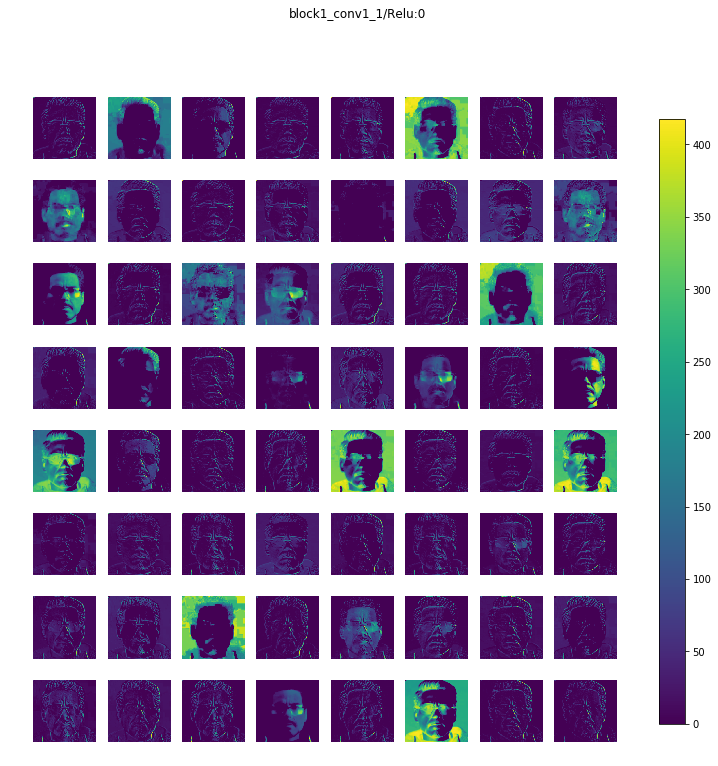

block1_conv2_1/Relu:0 (1, 224, 224, 64) 


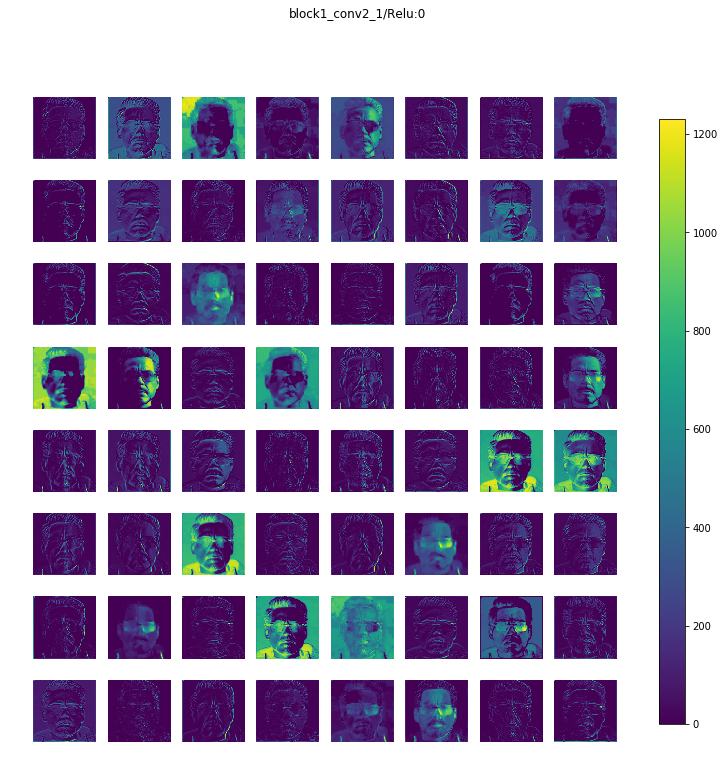

block1_pool_1/MaxPool:0 (1, 112, 112, 64) 


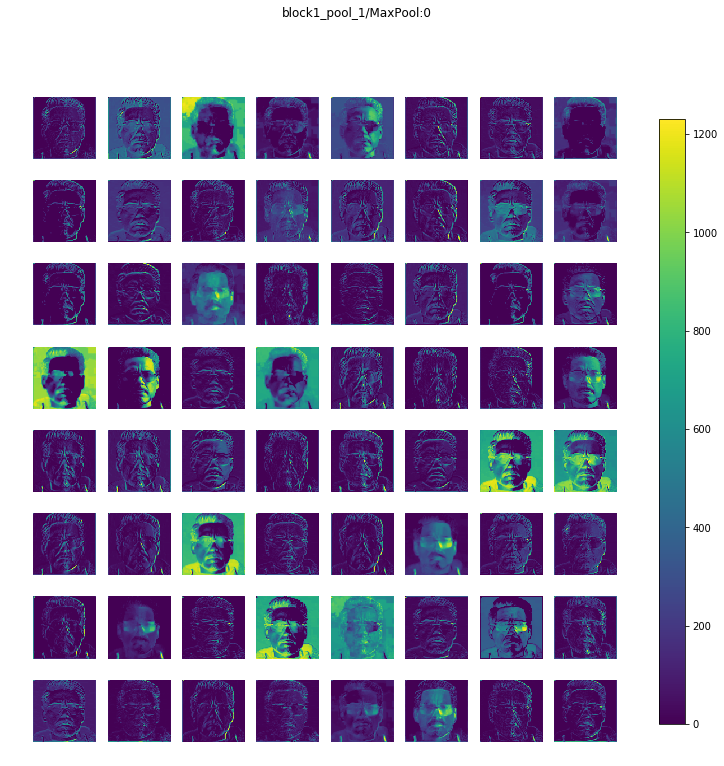

block2_conv1_1/Relu:0 (1, 112, 112, 128) 


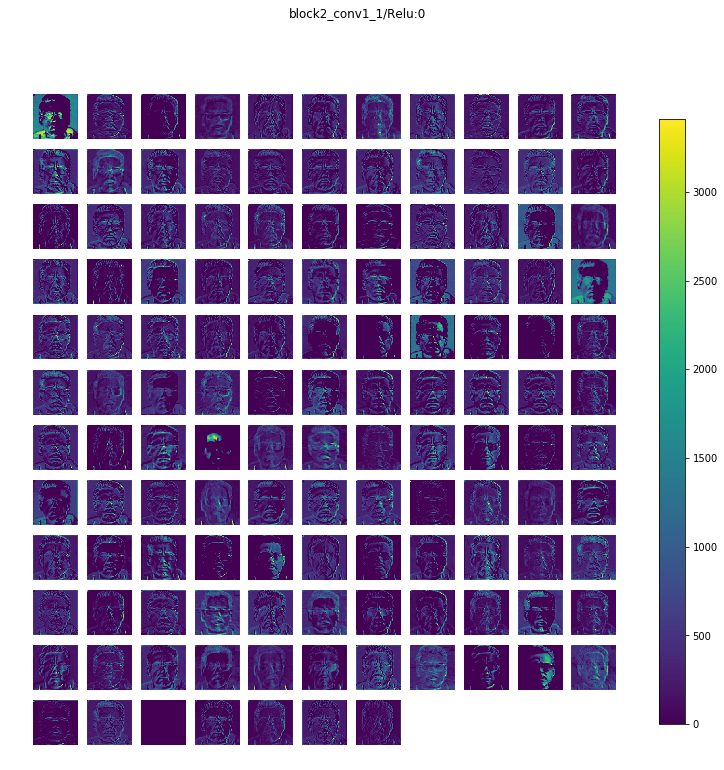

block2_conv2_1/Relu:0 (1, 112, 112, 128) 


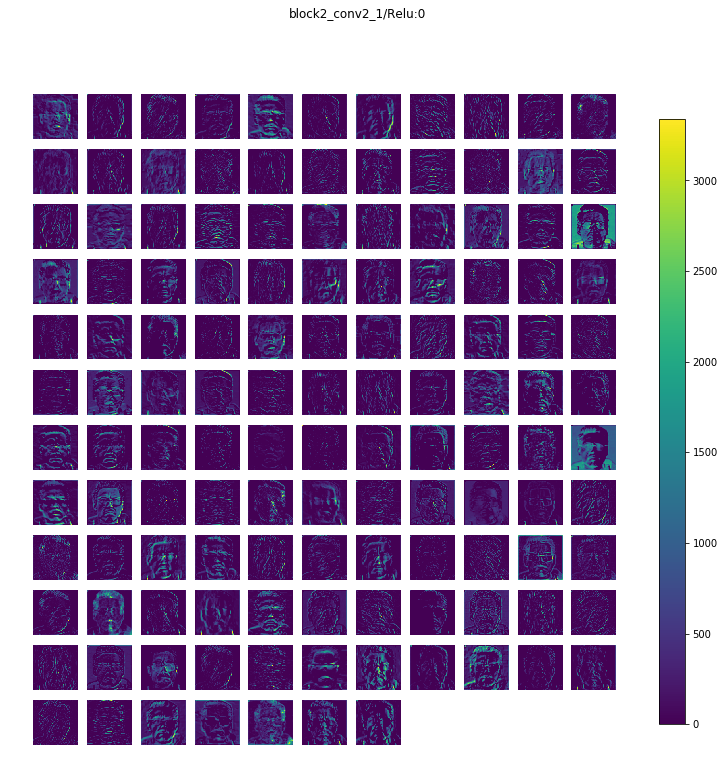

block2_pool_1/MaxPool:0 (1, 56, 56, 128) 


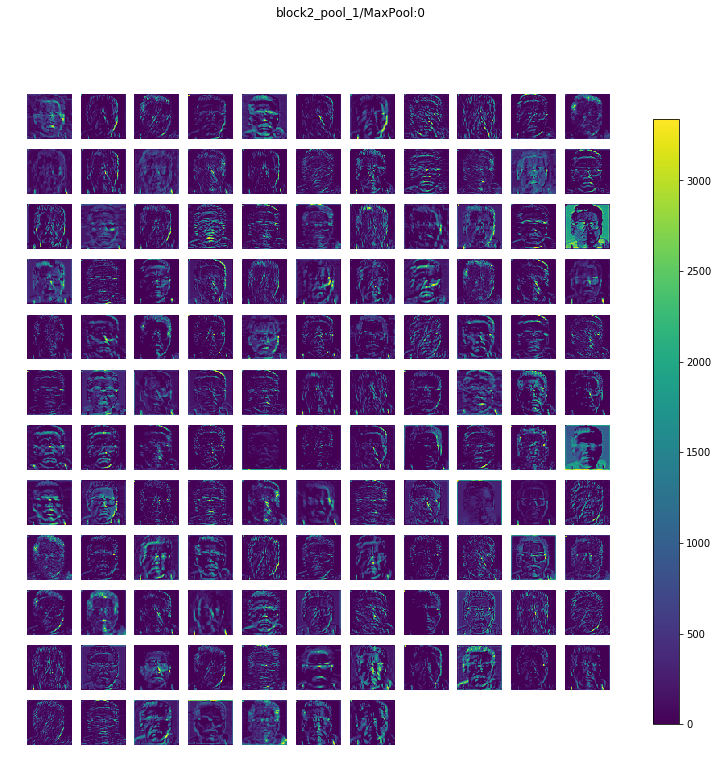

block3_conv1_1/Relu:0 (1, 56, 56, 256) 


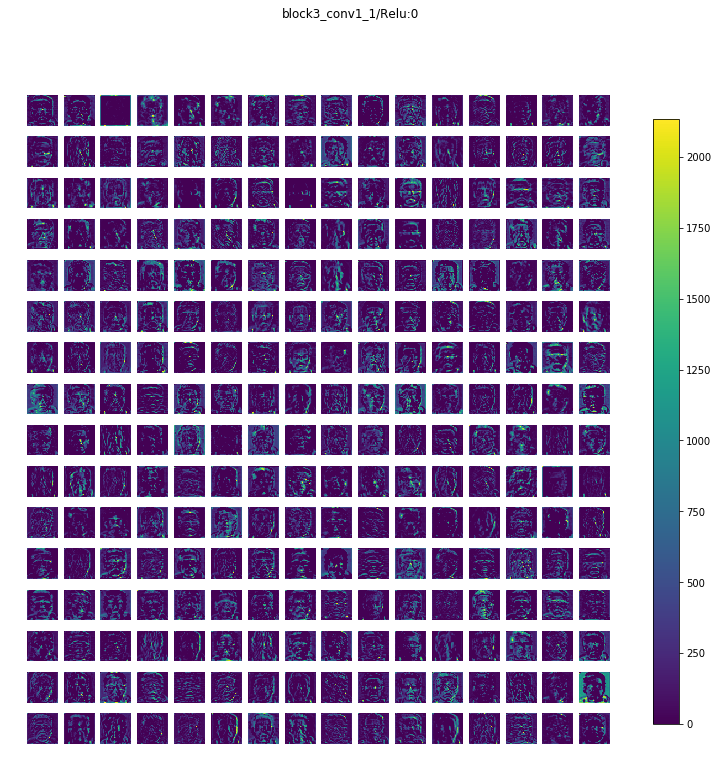

block3_conv2_1/Relu:0 (1, 56, 56, 256) 


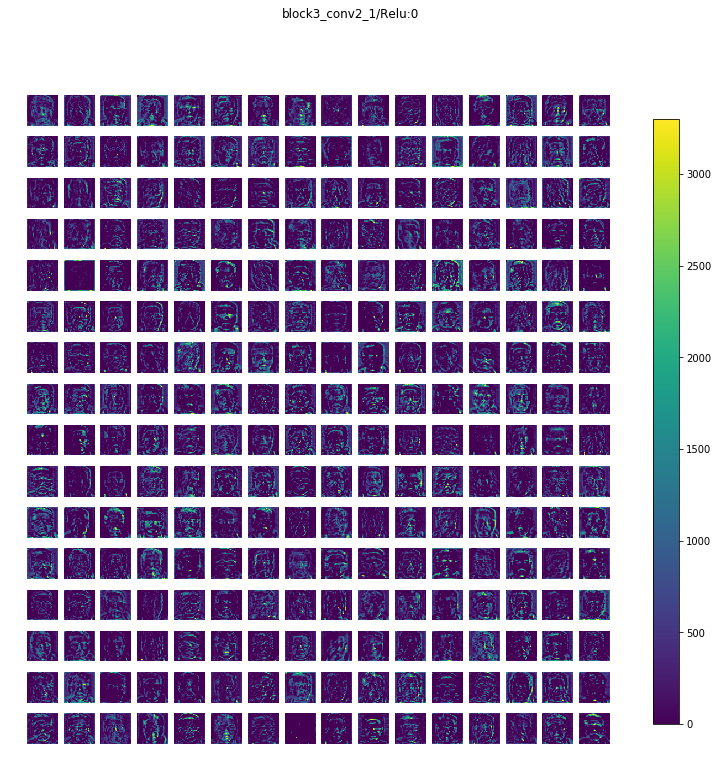

block3_conv3_1/Relu:0 (1, 56, 56, 256) 


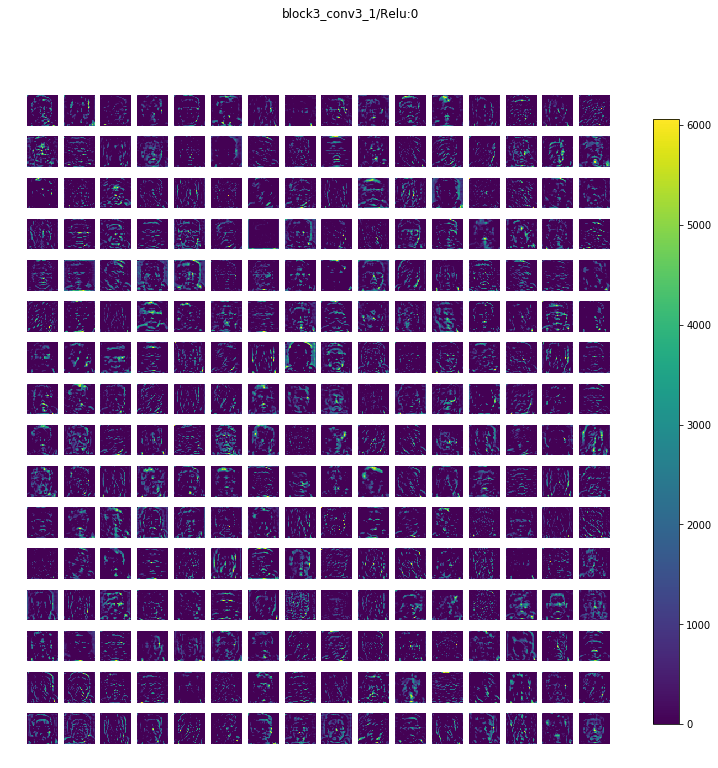

block3_pool_1/MaxPool:0 (1, 28, 28, 256) 


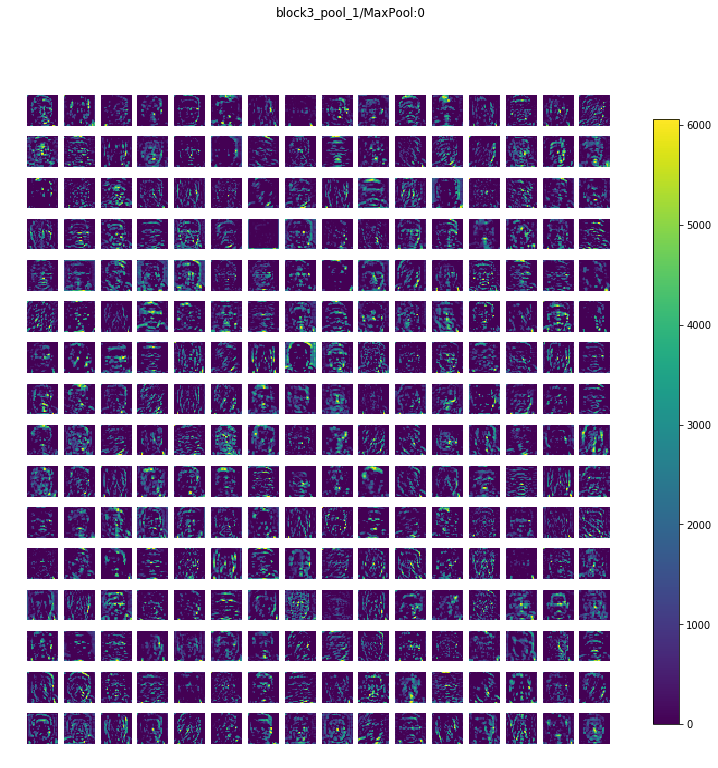

block4_conv1_1/Relu:0 (1, 28, 28, 512) 


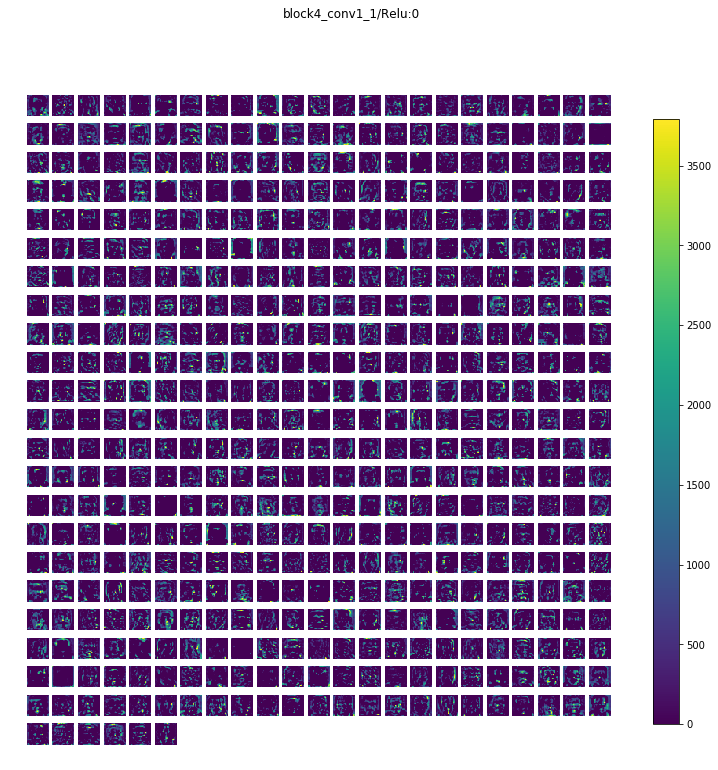

block4_conv2_1/Relu:0 (1, 28, 28, 512) 


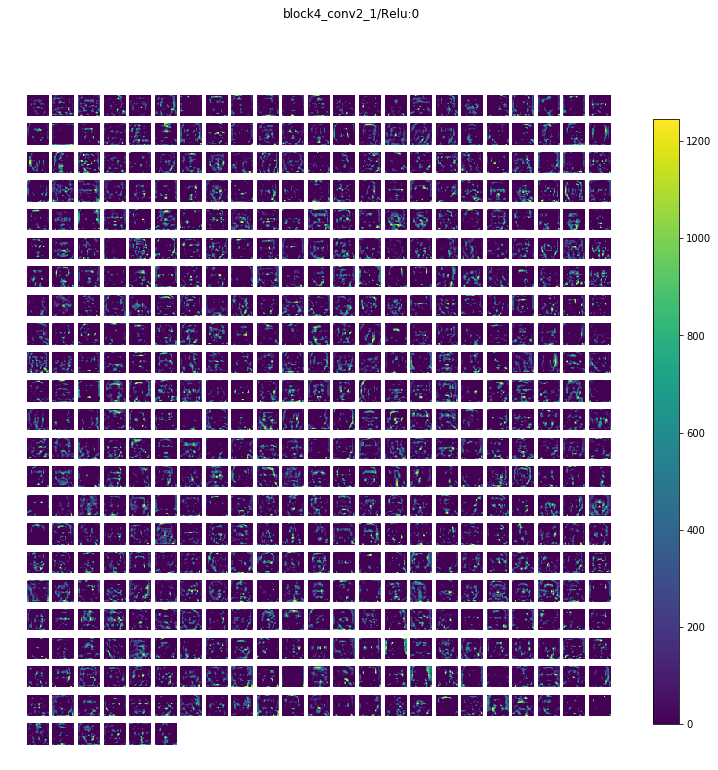

block4_conv3_1/Relu:0 (1, 28, 28, 512) 


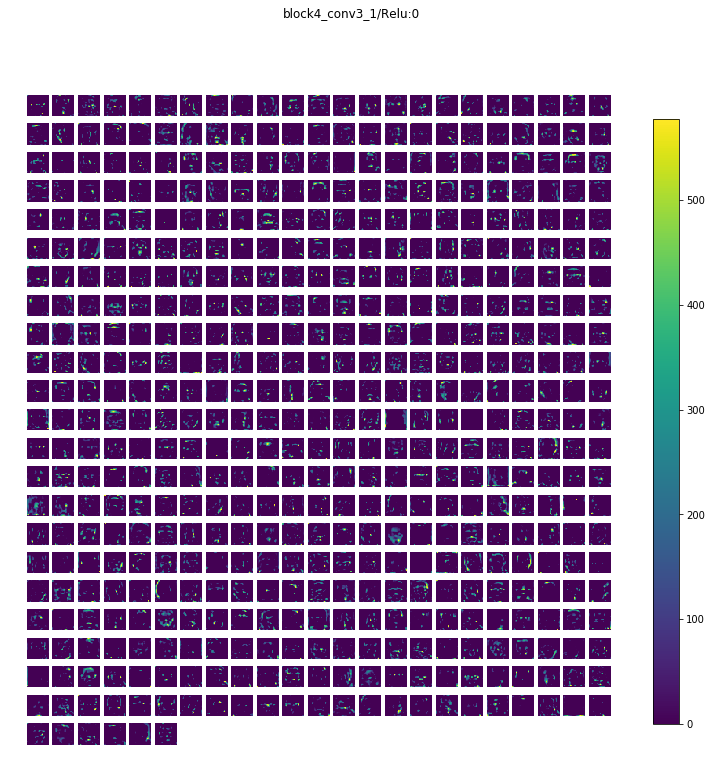

block4_pool_1/MaxPool:0 (1, 14, 14, 512) 


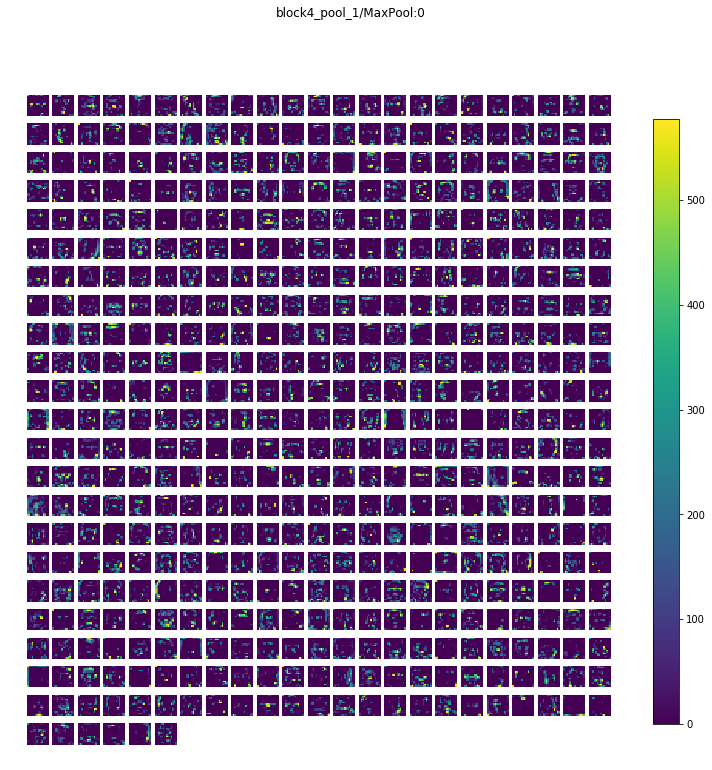

block5_conv1_1/Relu:0 (1, 14, 14, 512) 


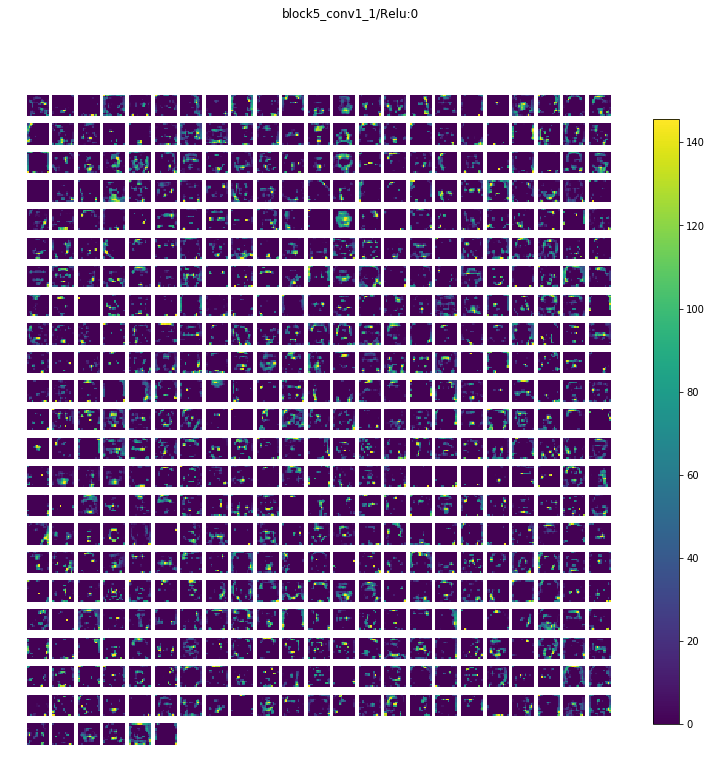

block5_conv2_1/Relu:0 (1, 14, 14, 512) 


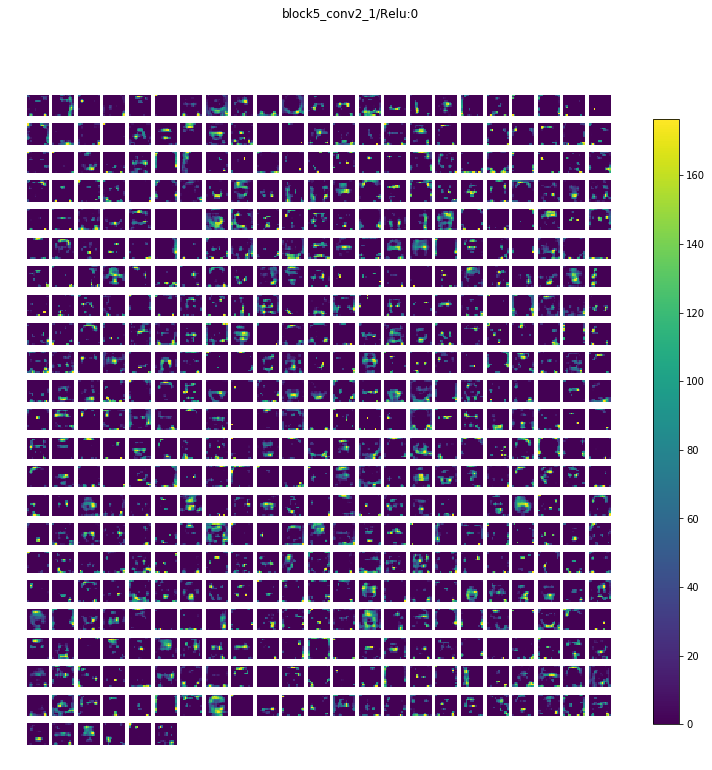

block5_conv3_1/Relu:0 (1, 14, 14, 512) 


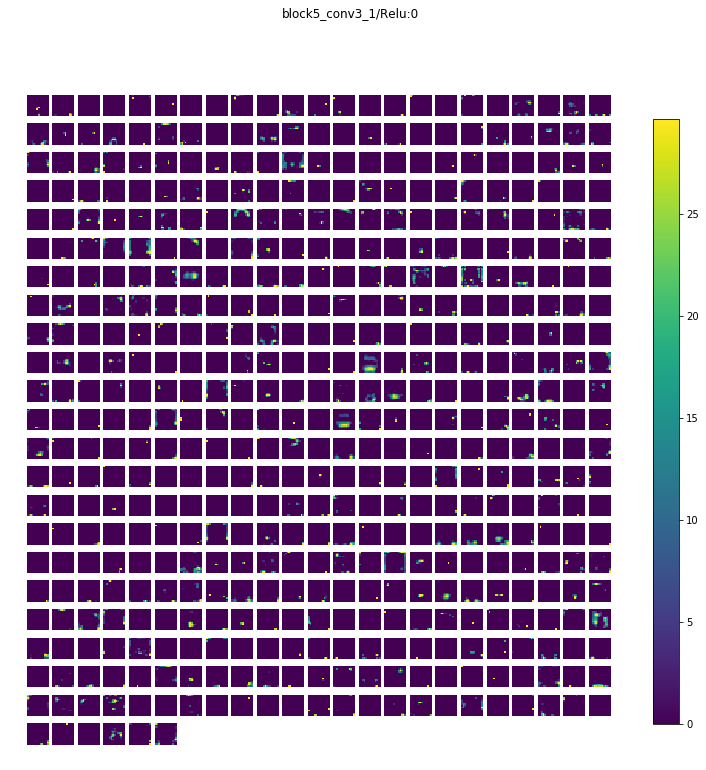

block5_pool_1/MaxPool:0 (1, 7, 7, 512) 


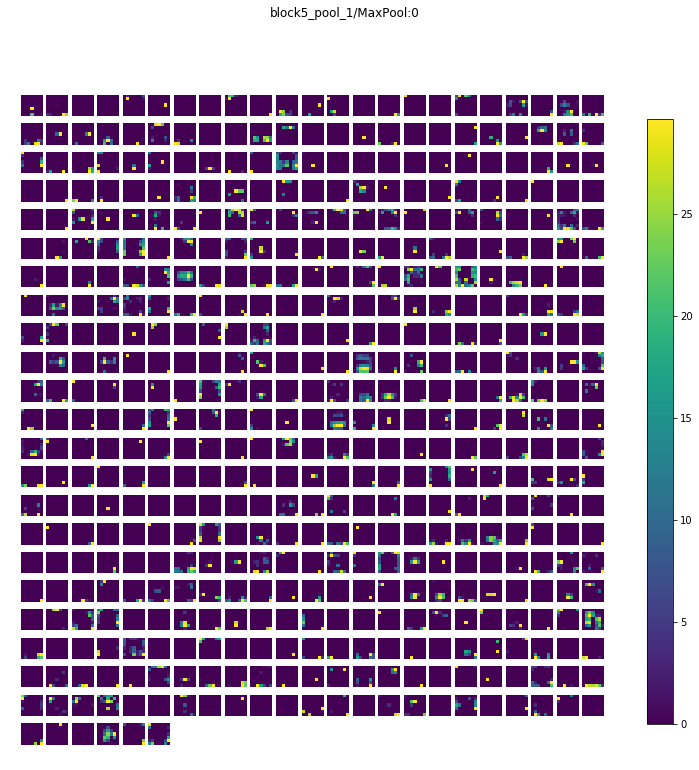

flatten_1/Reshape:0 (1, 25088) -> Skipped. 2D Activations.
fc1_1/Relu:0 (1, 4096) -> Skipped. 2D Activations.
fc2_1/Relu:0 (1, 4096) -> Skipped. 2D Activations.
predictions_1/Softmax:0 (1, 1000) -> Skipped. 2D Activations.


In [12]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array

model = VGG16()

from PIL import Image
import requests
from io import BytesIO

url = 'https://i.ibb.co/M98BHtM/tony-stark.png'
response = requests.get(url)
image = Image.open(BytesIO(response.content))
image = image.resize((224,224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print('{} ({})'.format(label[1], label[2] * 100))

import keract

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
activations = keract.get_activations(model, image)
first = activations.get('block1_conv1/Relu:0')
keract.display_activations(activations)

## Assignment 10B

**Objective** is to calculate the increase of receptive field from 29 to 45 (from convolution 6 to 7) in the network as shown in this paper https://arxiv.org/pdf/1701.03056.pdf

<img src="https://i.ibb.co/Cty8Bvs/Screenshot-from-2019-07-13-01-50-44.png" width="700" />

These formulas are used for calculating the receptive field:

<img src="https://i.ibb.co/NL37WfS/13.png" width="350" />

<img src="https://i.ibb.co/F70749x/b.png" width="400" />

The table shows the calculation for receptive field (***RF***) and the increase of receptive field from 29 to 45:

| ***Input   Layer***     | ***Padding***        | ***Strides*** | ***n<sub>in</sub>*** | ***n<sub>out</sub>*** | ***j<sub>in</sub>*** | ***j<sub>out</sub>***  | RF |
| ----------------- | -------------- | ------- | -------------- | --------------- | -------------- | --------------- | ------ |
| Convolution (3x3) | Padding = Same | 1       | 128            | 128             | 1              | 1               | 3      |
| Contracting Block |                |         |                |                 |                |                 |        |
| Convolution (3x3) | Padding = Same | 2       | 128            | 64              | 1              | 2               | 5      |
| Convolution (3x3) | Padding = Same | 1       | 64             | 64              | 2              | 2               | 9      |
| Contracting Block |                |         |                |                 |                |                 |        |
| Convolution (3x3) | Padding = Same | 2       | 64             | 32              | 2              | 4               | 13     |
| Convolution (3x3) | Padding = Same | 1       | 32             | 32              | 4              | 4               | 21     |
| Contracting Block |                |         |                |                 |                |                 |        |
| Convolution (3x3) | Padding = Same | 2       | 32             | 16              | 4              | 8               | ***29*** |
| Convolution (3x3) | Padding = Same | 1       | 16             | 16              | 8              | 8               | ***45*** |, 

